import library

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [239]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data preparation

import data

In [240]:
df = pd.read_csv("/content/drive/MyDrive/Developer Battle/Kesehatan/kesehatan.csv")

In [241]:
df.head()

,ID,Nama,Jenis_Kelamin,Usia,Tinggi_cm,Berat_kg,Tekanan_Darah,Diabetes,Cholesterol,Aktifitas_Fisik,Merokok,Riwayat_Penyakit_Keluarga,Diagnosa_Penyakit,Tanggal_Pemeriksaan
0,1,rendy sudiati,Pria,18,187.0,80,121/74,Ya,normal,sedang,Tidak,Tidak,Sehat,2024/08/13
1,2,"dt. saka hutagalung, s.pd",Laki-laki,42,154.0,75,122/78,Tidak,tinggi,sedang,Tidak,Tidak,Sehat,2024-11-11
2,3,Rahayu Saptono,Pria,35,184.0,99,133/77,Ya,Rendah,Rendah,Ya,Ya,Penyakit Jantung,2024-10-26
3,4,wage kuswoyo,Perempuan,20,186.0,103,158/67,Tidak,normal,sedang,Tidak,Tidak,Penyakit Jantung,2025/03/28
4,5,jaya sihombing,Laki-laki,23,142.0,74,127/65,Tidak,tinggi,NaN,NaN,Tidak,Sehat,2023-08-10


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1545 non-null   int64  
 1   Nama                       1545 non-null   object 
 2   Jenis_Kelamin              1545 non-null   object 
 3   Usia                       1545 non-null   int64  
 4   Tinggi_cm                  1545 non-null   float64
 5   Berat_kg                   1545 non-null   int64  
 6   Tekanan_Darah              1545 non-null   object 
 7   Diabetes                   1545 non-null   object 
 8   Cholesterol                1545 non-null   object 
 9   Aktifitas_Fisik            1468 non-null   object 
 10  Merokok                    1468 non-null   object 
 11  Riwayat_Penyakit_Keluarga  1545 non-null   object 
 12  Diagnosa_Penyakit          1545 non-null   object 
 13  Tanggal_Pemeriksaan        1545 non-null   objec

In [243]:
df.isnull().sum()

,0
ID,0
Nama,0
Jenis_Kelamin,0
Usia,0
Tinggi_cm,0
Berat_kg,0
Tekanan_Darah,0
Diabetes,0
Cholesterol,0
Aktifitas_Fisik,77


In [244]:
df.duplicated().sum()

np.int64(29)

bersihkan data yang kosong

In [245]:
print(f"Unique Value Merokok : {df['Merokok'].unique()}")
print(" ")
print(f"Value count : {df['Merokok'].value_counts()}")

print("-----------------------------------")

print(f"Unique Value Aktivitas Fisik : {df['Aktifitas_Fisik'].unique()}")
print(" ")
print(f"Value count : {df['Aktifitas_Fisik'].value_counts()}")





Unique Value Merokok : ['Tidak' 'Ya' nan]
 
Value count : Merokok
Tidak    1018
Ya        450
Name: count, dtype: int64
-----------------------------------
Unique Value Aktivitas Fisik : ['sedang' 'Rendah' nan 'tinggi' 'Sedang' 'rendah' 'Tinggi']
 
Value count : Aktifitas_Fisik
Rendah    437
Sedang    397
Tinggi    195
sedang    186
rendah    161
tinggi     92
Name: count, dtype: int64


In [246]:
# isi nilai kosong dengan nilai terbanyak
df.loc[:, 'Aktifitas_Fisik'] = df['Aktifitas_Fisik'].fillna(df['Aktifitas_Fisik'].mode()[0])
df.loc[:, 'Merokok'] = df['Merokok'].fillna(df['Merokok'].mode()[0])

In [247]:
df.isnull().sum()

,0
ID,0
Nama,0
Jenis_Kelamin,0
Usia,0
Tinggi_cm,0
Berat_kg,0
Tekanan_Darah,0
Diabetes,0
Cholesterol,0
Aktifitas_Fisik,0


bersihkan duplicate

In [248]:
# cek semua kolom duplicate berdasarkan nama
duplicate_row = df[df.duplicated(keep=False)]
duplicate_row.head()

,ID,Nama,Jenis_Kelamin,Usia,Tinggi_cm,Berat_kg,Tekanan_Darah,Diabetes,Cholesterol,Aktifitas_Fisik,Merokok,Riwayat_Penyakit_Keluarga,Diagnosa_Penyakit,Tanggal_Pemeriksaan
113,114,Endah Wasita,Laki-laki,82,172.0,69,134/82,Tidak,Tinggi,Tinggi,Ya,Ya,Sehat,2024-11-22
140,141,R.A. Michelle Padmasari,Pria,18,149.0,101,94/68,Ya,Tinggi,Rendah,Tidak,Tidak,Diabetes,2025-02-05
175,176,Galak Saputra,Laki-laki,22,182.0,60,149/79,Ya,Tinggi,Tinggi,Tidak,Tidak,Diabetes,2025-03-21
182,183,"eluh utami, s.h.",Perempuan,63,145.0,62,173/82,Ya,rendah,Rendah,Tidak,Tidak,Penyakit Jantung,2024-03-24
200,201,"Ella Siregar, S.I.Kom",Perempuan,63,164.0,105,97/100,Ya,Normal,Sedang,Tidak,Tidak,Hipertensi,2024-01-30


In [249]:
# bersihkan data duplikat
df = df.drop_duplicates(keep='first').reset_index(drop=True)
df.head()

,ID,Nama,Jenis_Kelamin,Usia,Tinggi_cm,Berat_kg,Tekanan_Darah,Diabetes,Cholesterol,Aktifitas_Fisik,Merokok,Riwayat_Penyakit_Keluarga,Diagnosa_Penyakit,Tanggal_Pemeriksaan
0,1,rendy sudiati,Pria,18,187.0,80,121/74,Ya,normal,sedang,Tidak,Tidak,Sehat,2024/08/13
1,2,"dt. saka hutagalung, s.pd",Laki-laki,42,154.0,75,122/78,Tidak,tinggi,sedang,Tidak,Tidak,Sehat,2024-11-11
2,3,Rahayu Saptono,Pria,35,184.0,99,133/77,Ya,Rendah,Rendah,Ya,Ya,Penyakit Jantung,2024-10-26
3,4,wage kuswoyo,Perempuan,20,186.0,103,158/67,Tidak,normal,sedang,Tidak,Tidak,Penyakit Jantung,2025/03/28
4,5,jaya sihombing,Laki-laki,23,142.0,74,127/65,Tidak,tinggi,Rendah,Tidak,Tidak,Sehat,2023-08-10


ubah tipe data

In [250]:
df['Tanggal_Pemeriksaan'] = df['Tanggal_Pemeriksaan'].str.replace("/", "-", regex=False)

# lalu convert ke datetime
df['Tanggal_Pemeriksaan'] = pd.to_datetime(df['Tanggal_Pemeriksaan'], format="%Y-%m-%d", errors="coerce")

In [251]:
df['Tanggal_Pemeriksaan'].head()

,Tanggal_Pemeriksaan
0,2024-08-13
1,2024-11-11
2,2024-10-26
3,2025-03-28
4,2023-08-10


perbaiki kolom jenis kelamin

In [252]:
target_col = 'Jenis_Kelamin'
nilai_pengganti = {
    "Pria" : "Laki-laki"
}

df[target_col] = df[target_col].replace(nilai_pengganti)

# Data Preprocessing

feature engineering

In [253]:
# buat kolom BMI
df['BMI'] = df['Berat_kg'] / ( (df['Tinggi_cm'] / 100) ** 2 )

# buat kolom untuk kategori BMI
def kategori_bmi(bmi):
    if bmi < 18.5:
        return "Kurus"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obesitas"

df['Kategori_BMI'] = df['BMI'].apply(kategori_bmi)

In [254]:
# buat untuk tekanana darah
df[['Sistolik', 'Diastolik']] = df['Tekanan_Darah'].str.split('/', expand=True).astype(float)

# untuk kategori tekanan darah
def kategori_bp(sys, dia):
    if sys < 120 and dia < 80:
        return "Normal"
    elif 120 <= sys < 140 or 80 <= dia < 90:
        return "Pre-Hipertensi"
    elif 140 <= sys < 160 or 90 <= dia < 100:
        return "Hipertensi Stage 1"
    elif sys >= 160 or dia >= 100:
        return "Hipertensi Stage 2"
    else:
        return "Tidak Diketahui"

df['Kategori_TekananDarah'] = df.apply(lambda x: kategori_bp(x['Sistolik'], x['Diastolik']), axis=1)


# Exploratory Data Analysis

In [255]:
# statistik deskriptif fitur numerik
df[['Usia', 'Tinggi_cm', 'Berat_kg', 'BMI', 'Sistolik', 'Diastolik']].describe()

,Usia,Tinggi_cm,Berat_kg,BMI,Sistolik,Diastolik
count,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000
mean,53.173483,165.008575,91.552111,34.344777,133.573219,85.112797
std,22.194927,14.731365,104.377624,39.648882,26.088335,14.749922
min,15.000000,140.000000,45.000000,12.742382,90.000000,60.000000
25%,33.000000,152.000000,61.000000,22.597585,111.750000,72.000000
50%,55.000000,165.000000,78.000000,28.085581,132.000000,85.000000
75%,72.000000,178.000000,94.000000,35.224514,155.000000,98.000000
max,90.000000,190.000000,1070.000000,431.457986,180.000000,110.000000


/tmp/ipython-input-1065288380.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Jenis_Kelamin', data=df, palette="Set2")


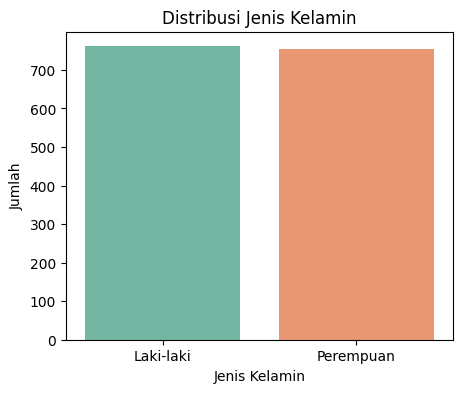

In [256]:
# distribusi jenis kelamin
plt.figure(figsize=(5,4))
sns.countplot(x='Jenis_Kelamin', data=df, palette="Set2")
plt.title("Distribusi Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.show()

dari sini bisa dilihat bahwa distribusi laki-laki dan perempuan seimbang

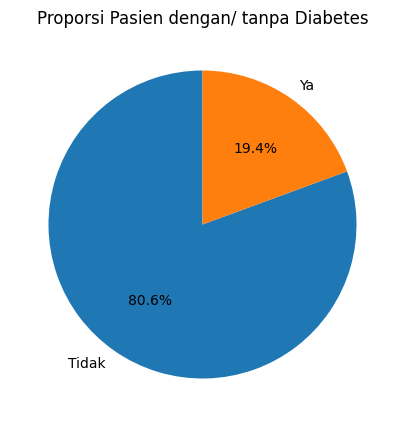

In [257]:
# proporsi pasien dengan/tanpa diabeter
diabetes_counts = df['Diabetes'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Proporsi Pasien dengan/ tanpa Diabetes")
plt.show()


dari pie chart diatas, terlihat bahwa ada lebih banyak pasien yang tidak mengidap diabetes

/tmp/ipython-input-1186599806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kategori_BMI', data=df, palette="pastel", order=df['Kategori_BMI'].value_counts().index)


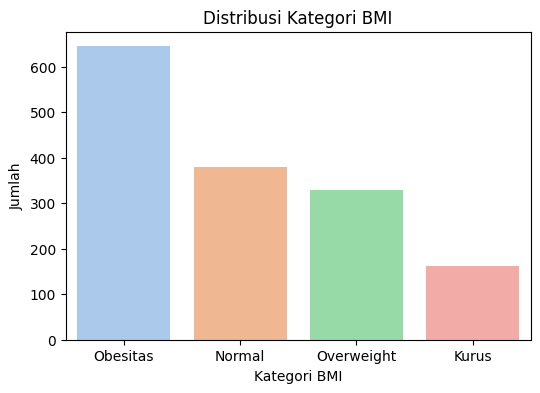

In [258]:
# distribusi kategori BMi
plt.figure(figsize=(6,4))
sns.countplot(x='Kategori_BMI', data=df, palette="pastel", order=df['Kategori_BMI'].value_counts().index)
plt.title("Distribusi Kategori BMI")
plt.xlabel("Kategori BMI")
plt.ylabel("Jumlah")
plt.show()


dari sini bisa dilihat bahwa ada banyak pasien yang memiliki kategori BMI obesitas, namun disamping itu ada juga banyak pasien yang memiliki kategori BMI normal.

/tmp/ipython-input-547200146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kategori_TekananDarah', data=df, palette="muted", order=df['Kategori_TekananDarah'].value_counts().index)


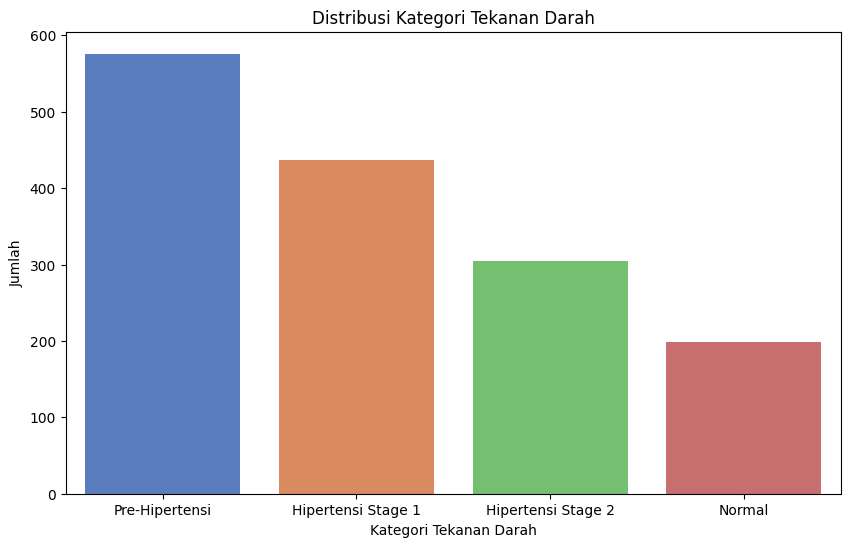

In [259]:
# distribusi kategori tekanan darah
plt.figure(figsize=(10,6))
sns.countplot(x='Kategori_TekananDarah', data=df, palette="muted", order=df['Kategori_TekananDarah'].value_counts().index)
plt.title("Distribusi Kategori Tekanan Darah")
plt.xlabel("Kategori Tekanan Darah")
plt.ylabel("Jumlah")
plt.show()


dari hasil visualisasi data bisa dilihat bahwa ada ada banyak pasien yang mencapai tingkat tekanan darah tidak aman. dan bahkan pasien yang memiliki tekanan darah normal sangat sedikit

/tmp/ipython-input-2262546992.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diagnosa_counts.index, y=diagnosa_counts.values, palette="pastel")


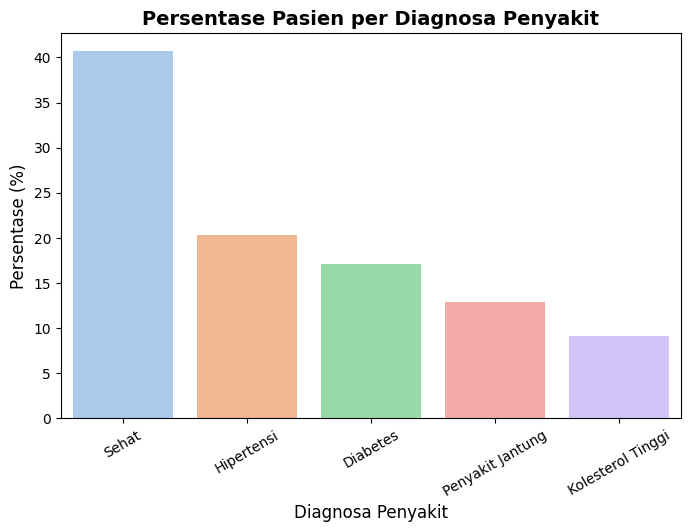

In [260]:
dadiagnosa_counts = df['Diagnosa_Penyakit'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
sns.barplot(x=diagnosa_counts.index, y=diagnosa_counts.values, palette="pastel")

plt.title("Persentase Pasien per Diagnosa Penyakit", fontsize=14, fontweight="bold")
plt.xlabel("Diagnosa Penyakit", fontsize=12)
plt.ylabel("Persentase (%)", fontsize=12)
plt.xticks(rotation=30)
plt.show()


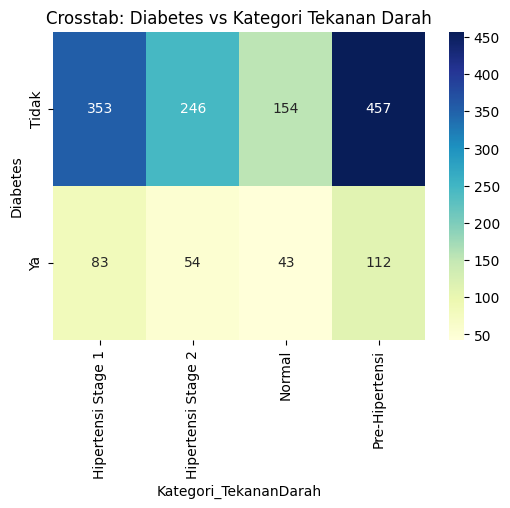

In [261]:
# Visualisasi dengan heatmap
plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Crosstab: Diabetes vs Kategori Tekanan Darah")
plt.show()


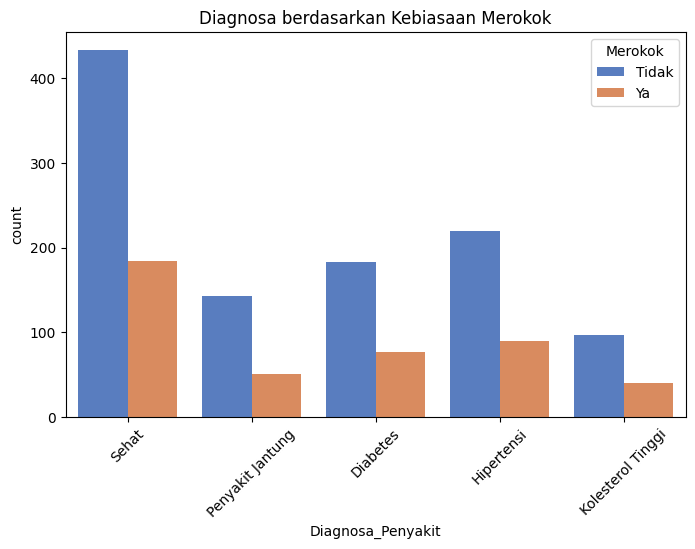

In [262]:
# Clustered bar chart Merokok vs Diagnosa Penyakit
plt.figure(figsize=(8,5))
sns.countplot(x='Diagnosa_Penyakit', hue='Merokok', data=df, palette="muted")
plt.title("Diagnosa berdasarkan Kebiasaan Merokok")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2697065088.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=per_tahun.index, y=per_tahun.values, palette="Blues_d")


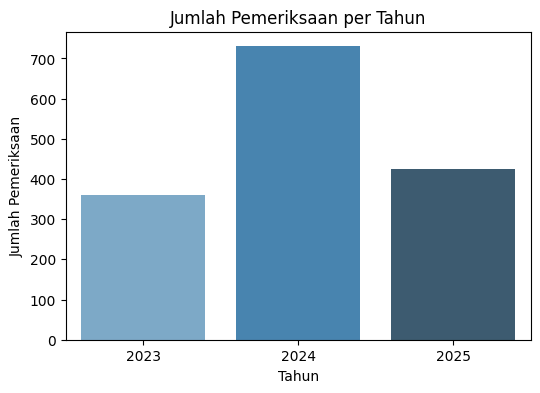

In [263]:
# Hitung per tahun
per_tahun = df['Tanggal_Pemeriksaan'].dt.year.value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=per_tahun.index, y=per_tahun.values, palette="Blues_d")
plt.title("Jumlah Pemeriksaan per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Pemeriksaan")
plt.show()